# Page View Time Series Visualizer

Para este proyecto visualizarás datos de series temporales utilizando un gráfico de líneas, un gráfico de barras y gráficos de cajas. Utilizarás Pandas, Matplotlib y Seaborn para visualizar un conjunto de datos que contiene el número de páginas vistas cada día en el foro de freeCodeCamp.org desde 2016-05-09 hasta 2019-12-03. Las visualizaciones de datos te ayudarán a entender los patrones de las visitas y a identificar el crecimiento anual y mensual.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv")

# Pasamos a formato fecha la fecha
df['date']= pd.to_datetime(df['date'], format="%Y-%m-%d")

# Set the index to the "date" column.
df = df.set_index('date')
#df.index= pd.to_datetime(df.index, format="%Y-%m-%d")

df.index

DatetimeIndex(['2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18',
               ...
               '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1304, freq=None)

In [5]:
# Clean data
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset
df = df[(df['value']>=df['value'].quantile(0.025)) &(df['value']<=df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


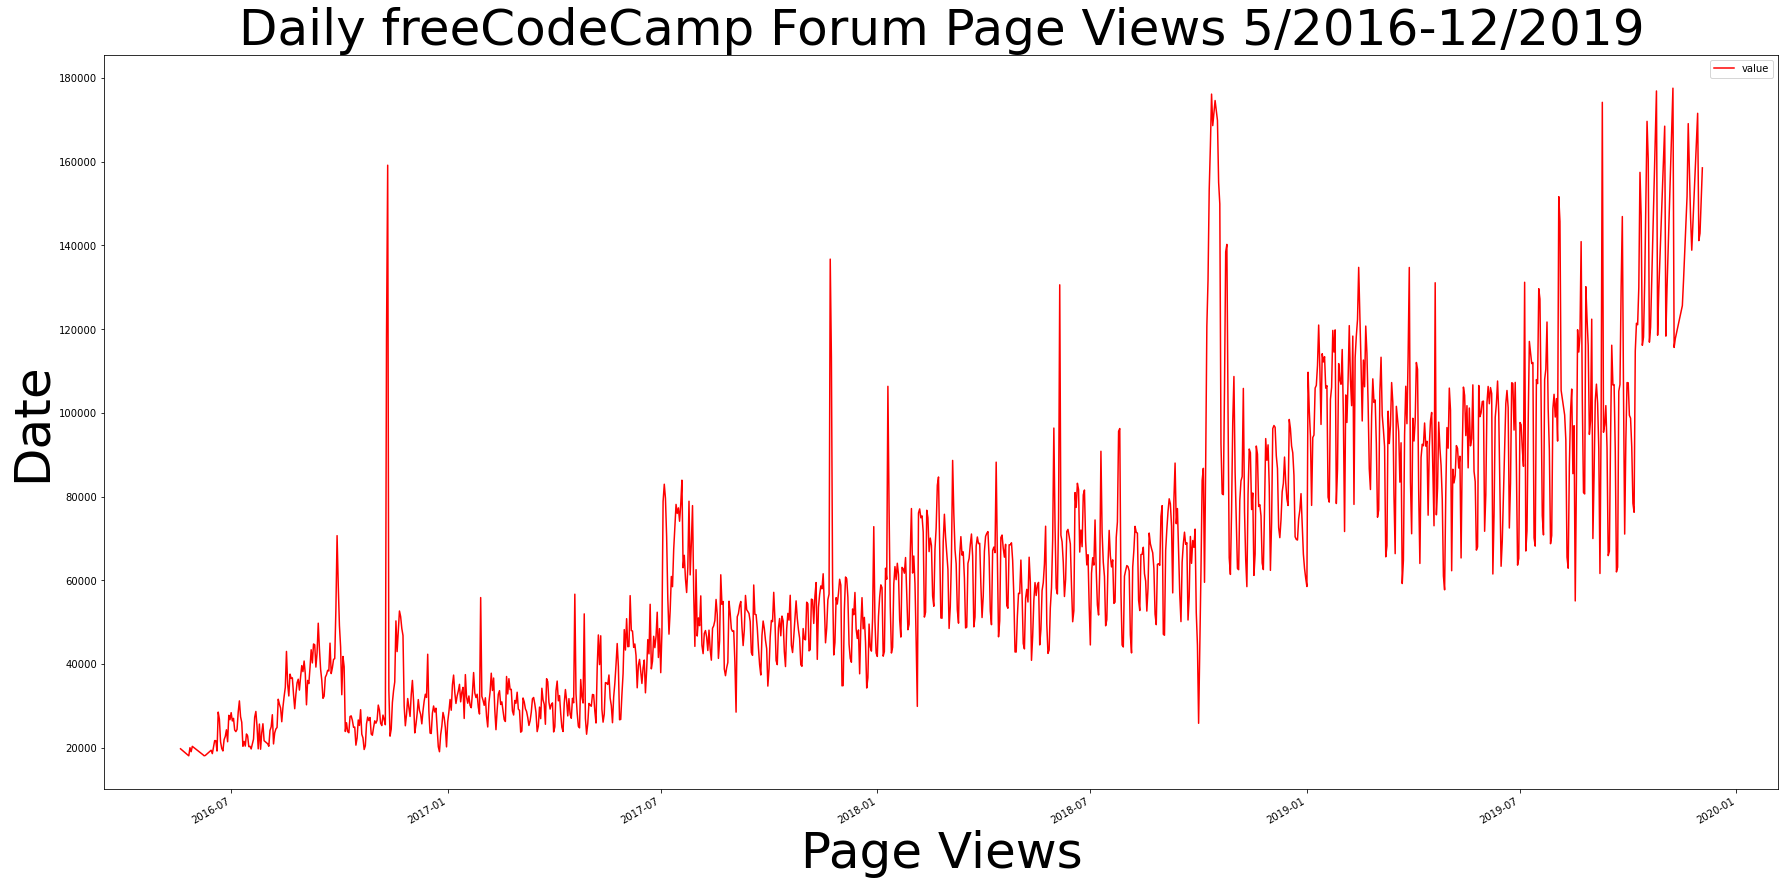

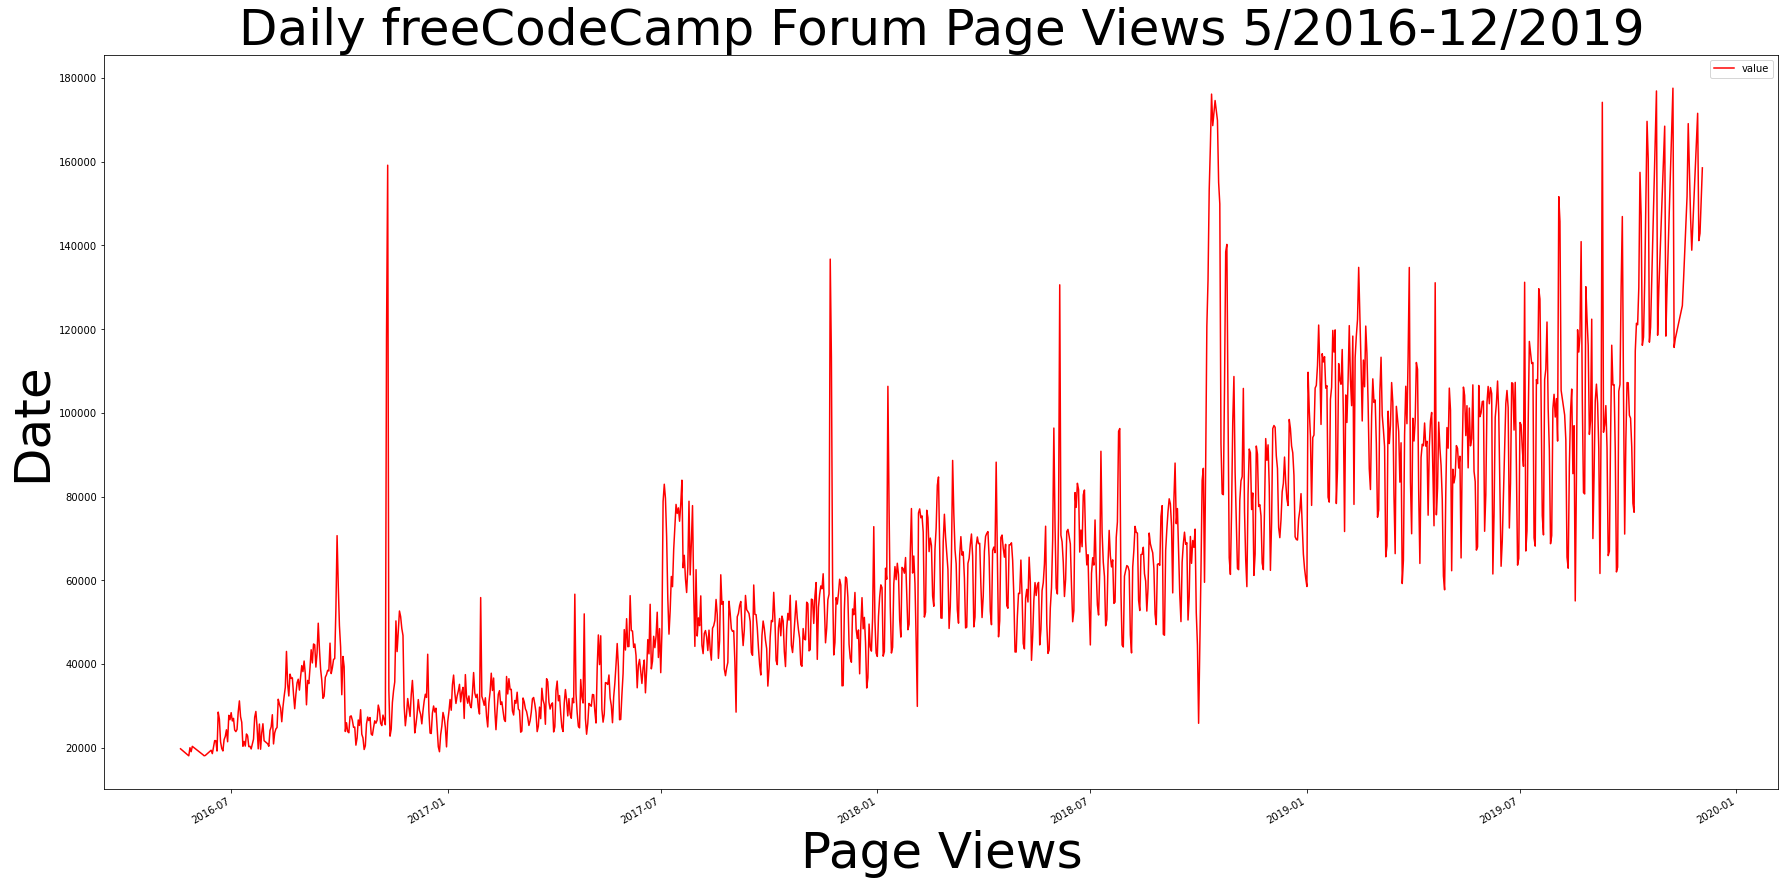

In [6]:
'''Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019".
The label on the x axis should be "Date" and the label on the y axis should be "Page Views".'''

def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots()
    fig.set_figheight(15)
    fig.set_figwidth(30)
    df.plot(ax = ax, color='r')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', fontdict = {'fontsize':50})
    ax.set_ylabel('Date', fontdict = {'fontsize':50})
    ax.set_xlabel('Page Views', fontdict = {'fontsize':50})
    plt.show()

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

draw_line_plot()

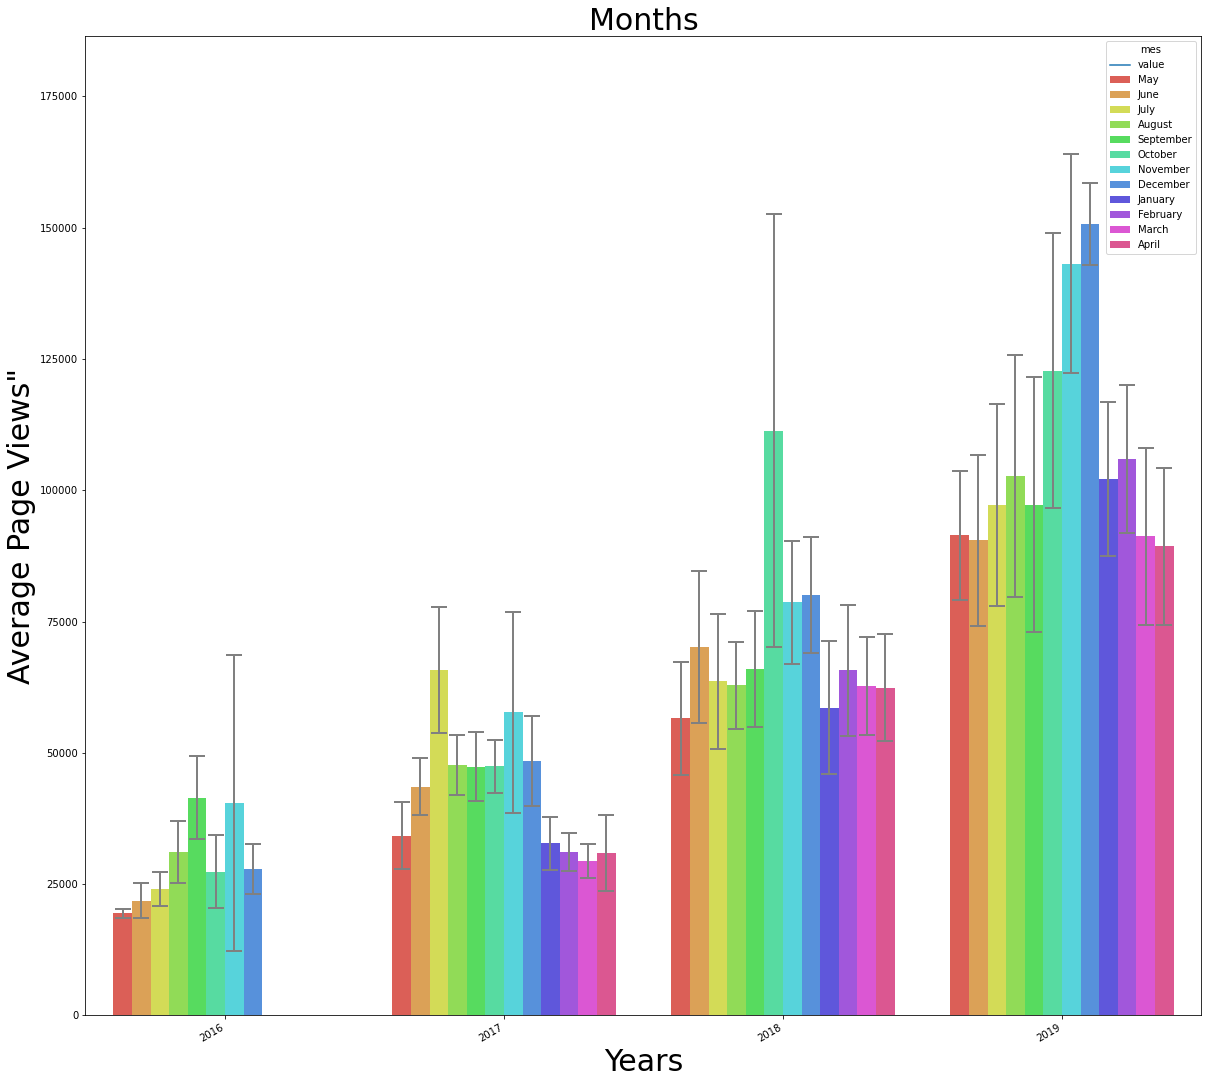

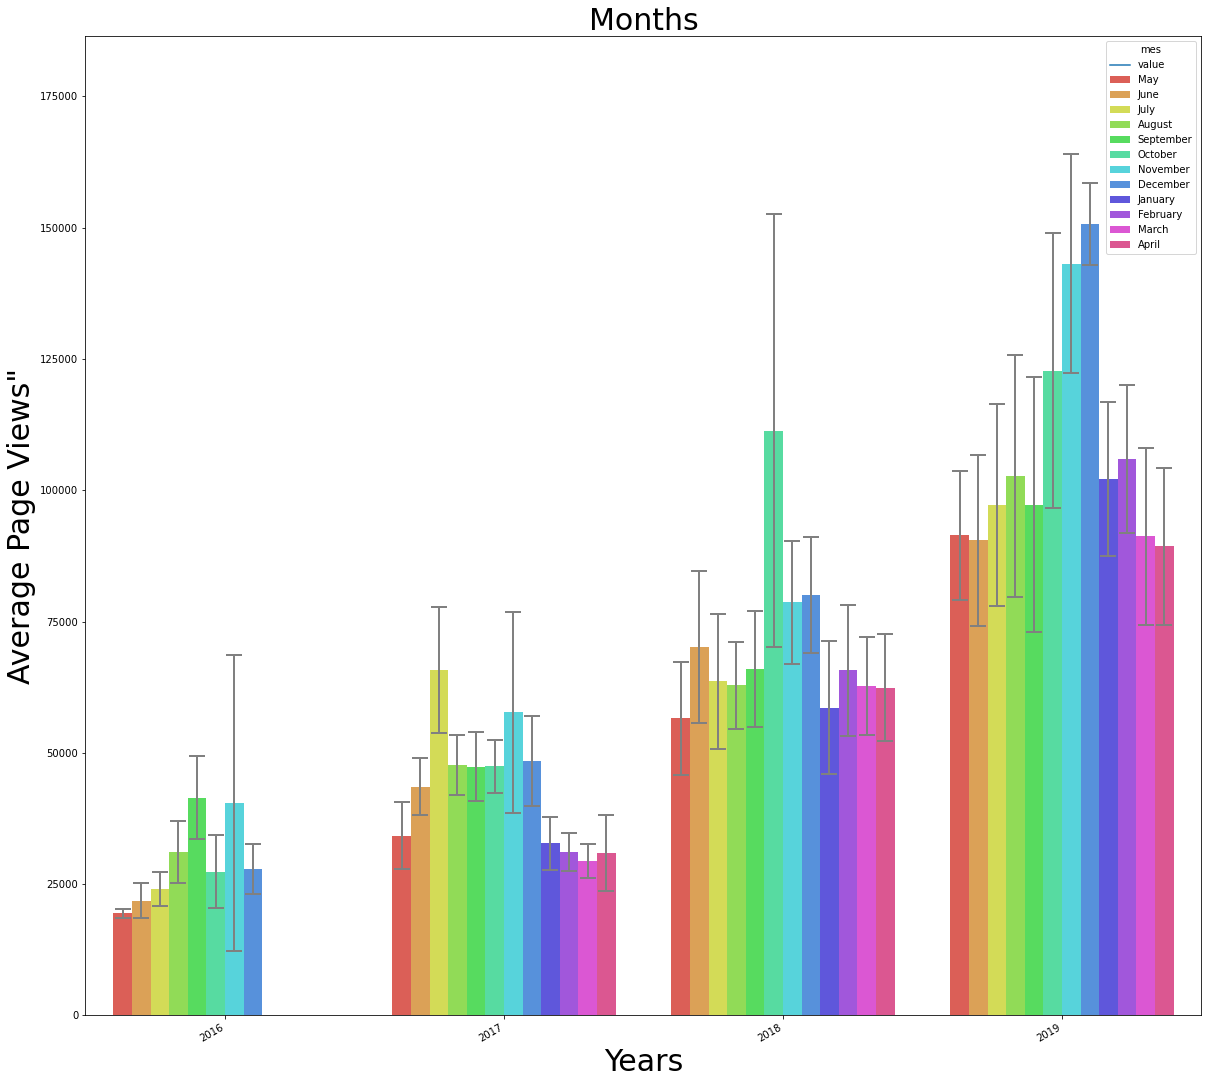

In [66]:
'''It should show average daily page views for each month grouped by year.
The legend should show month labels and have a title of "Months".
On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".'''


import datetime 

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df
    df_bar['mes'] =df.index.strftime("%B")
    df_bar['anno']= df.index.strftime("%Y")

    # Draw bar plot
    
    #dir(df.index)
    fig, ax = plt.subplots(figsize= (20,20))

    df.plot(ax = ax, )

    sns.barplot(x = 'anno', y ='value'  , data = df_bar, hue ='mes' ,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

    ax.set_title('Months', fontdict = {'fontsize':30})
    ax.set_ylabel('Average Page Views', fontdict = {'fontsize':30})
    ax.set_xlabel('Years', fontdict = {'fontsize':30})


    plt.show()


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()

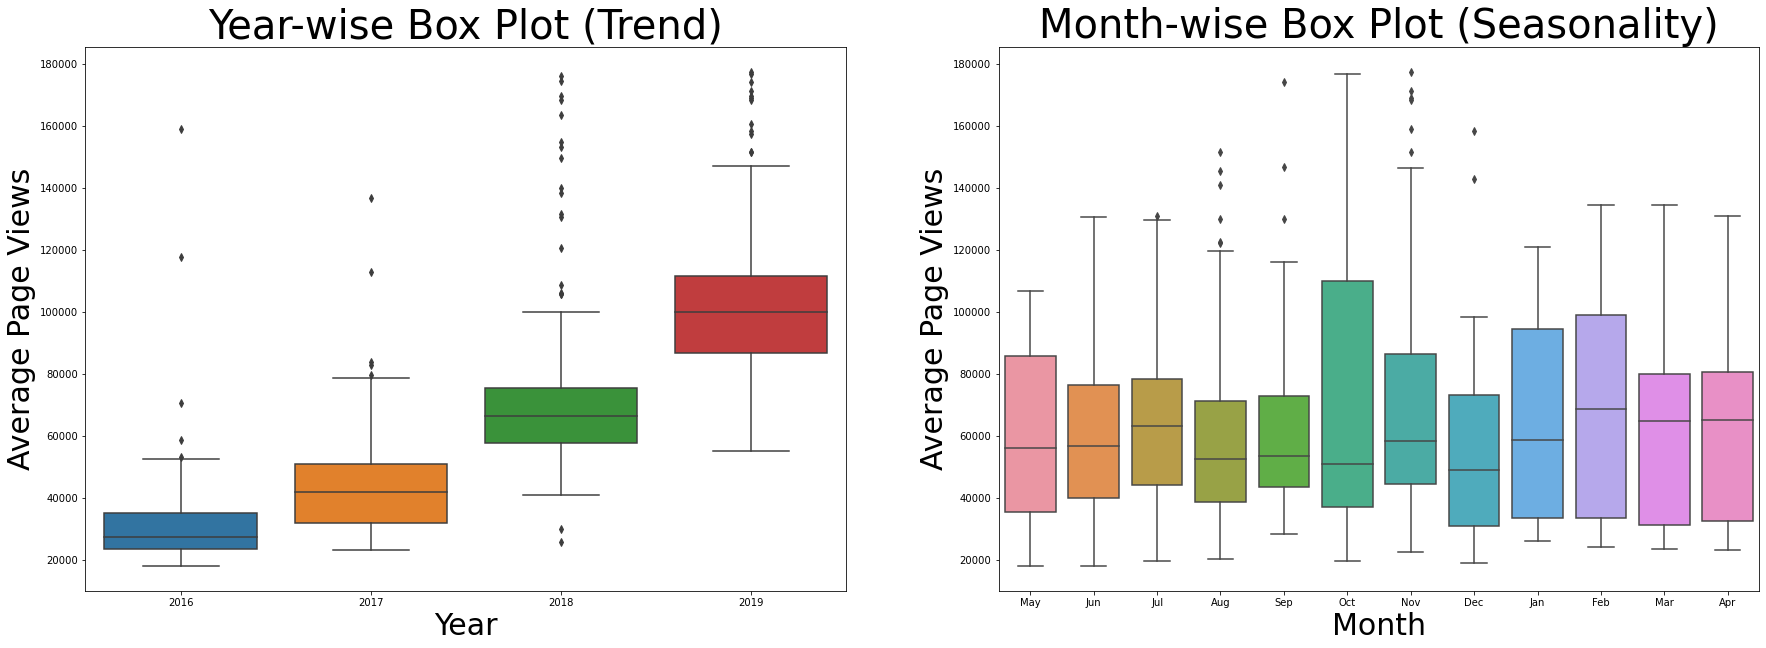

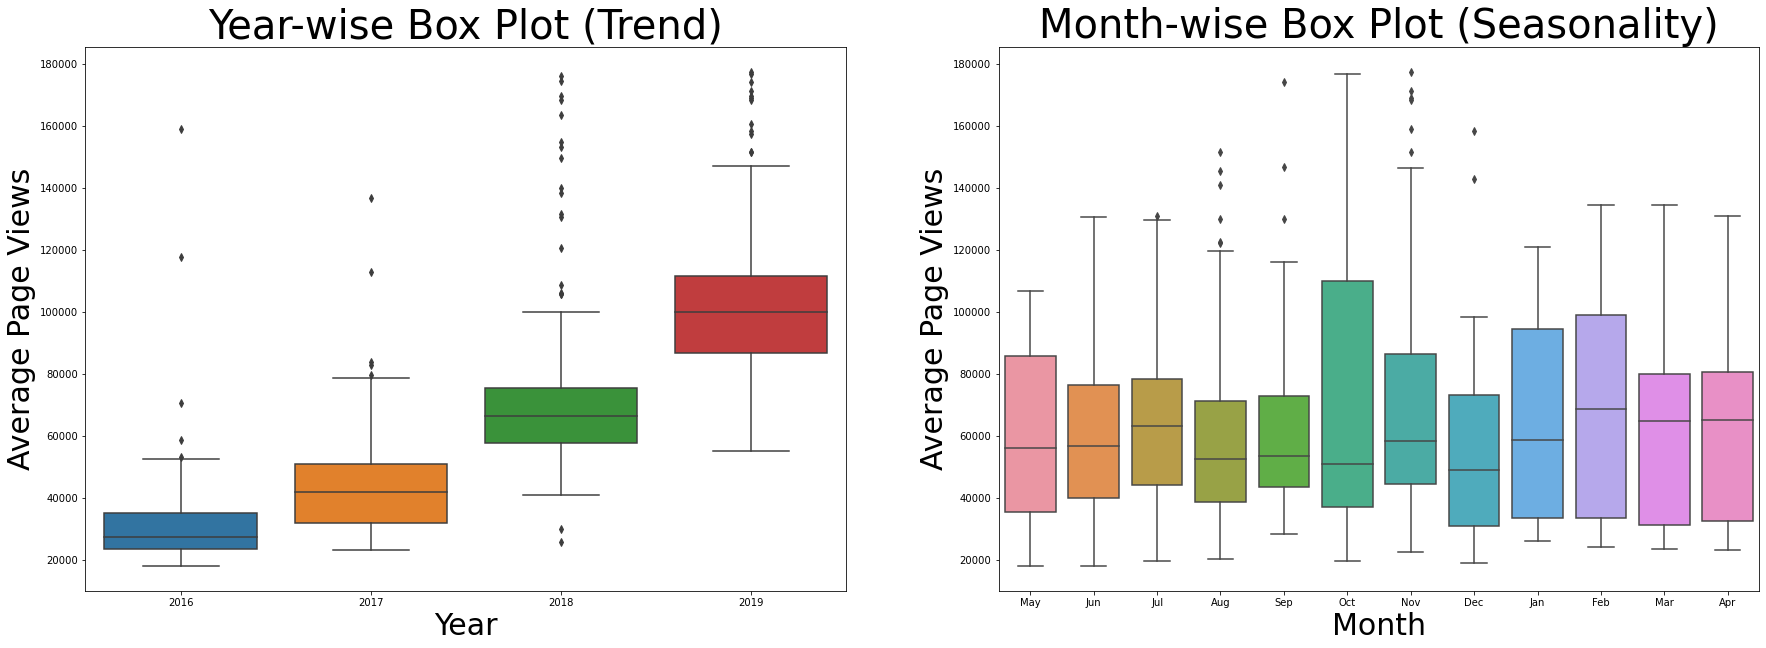

In [85]:
''' These box plots should show how the values are distributed within a given year or month and how it compares over time.
The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)".
Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.
The boilerplate includes commands to prepare the data.'''


def draw_box_plot():
    
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    
    # Dividimos el gráfico en dos
    fig, axes = plt.subplots(1, 2,figsize= (30,10))

    # Fijamos los titulos
    axes[0].set_title("Year-wise Box Plot (Trend)", fontdict = {'fontsize':40})
    axes[1].set_title("Month-wise Box Plot (Seasonality)", fontdict = {'fontsize':40})

    # Graficamos a la izquierda
    sns.boxplot(x = 'year', y = 'value',data = df_box, ax = axes[0])
    sns.boxplot(x = 'month', y = 'value',data = df_box, ax = axes[1])

    # Titulamos los ejes
    axes[0].set_ylabel('Average Page Views', fontdict = {'fontsize':30})
    axes[0].set_xlabel('Year', fontdict = {'fontsize':30})

    axes[1].set_ylabel('Average Page Views', fontdict = {'fontsize':30})
    axes[1].set_xlabel('Month', fontdict = {'fontsize':30})


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()